In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

Thanks to https://stackoverflow.com/a/45560545

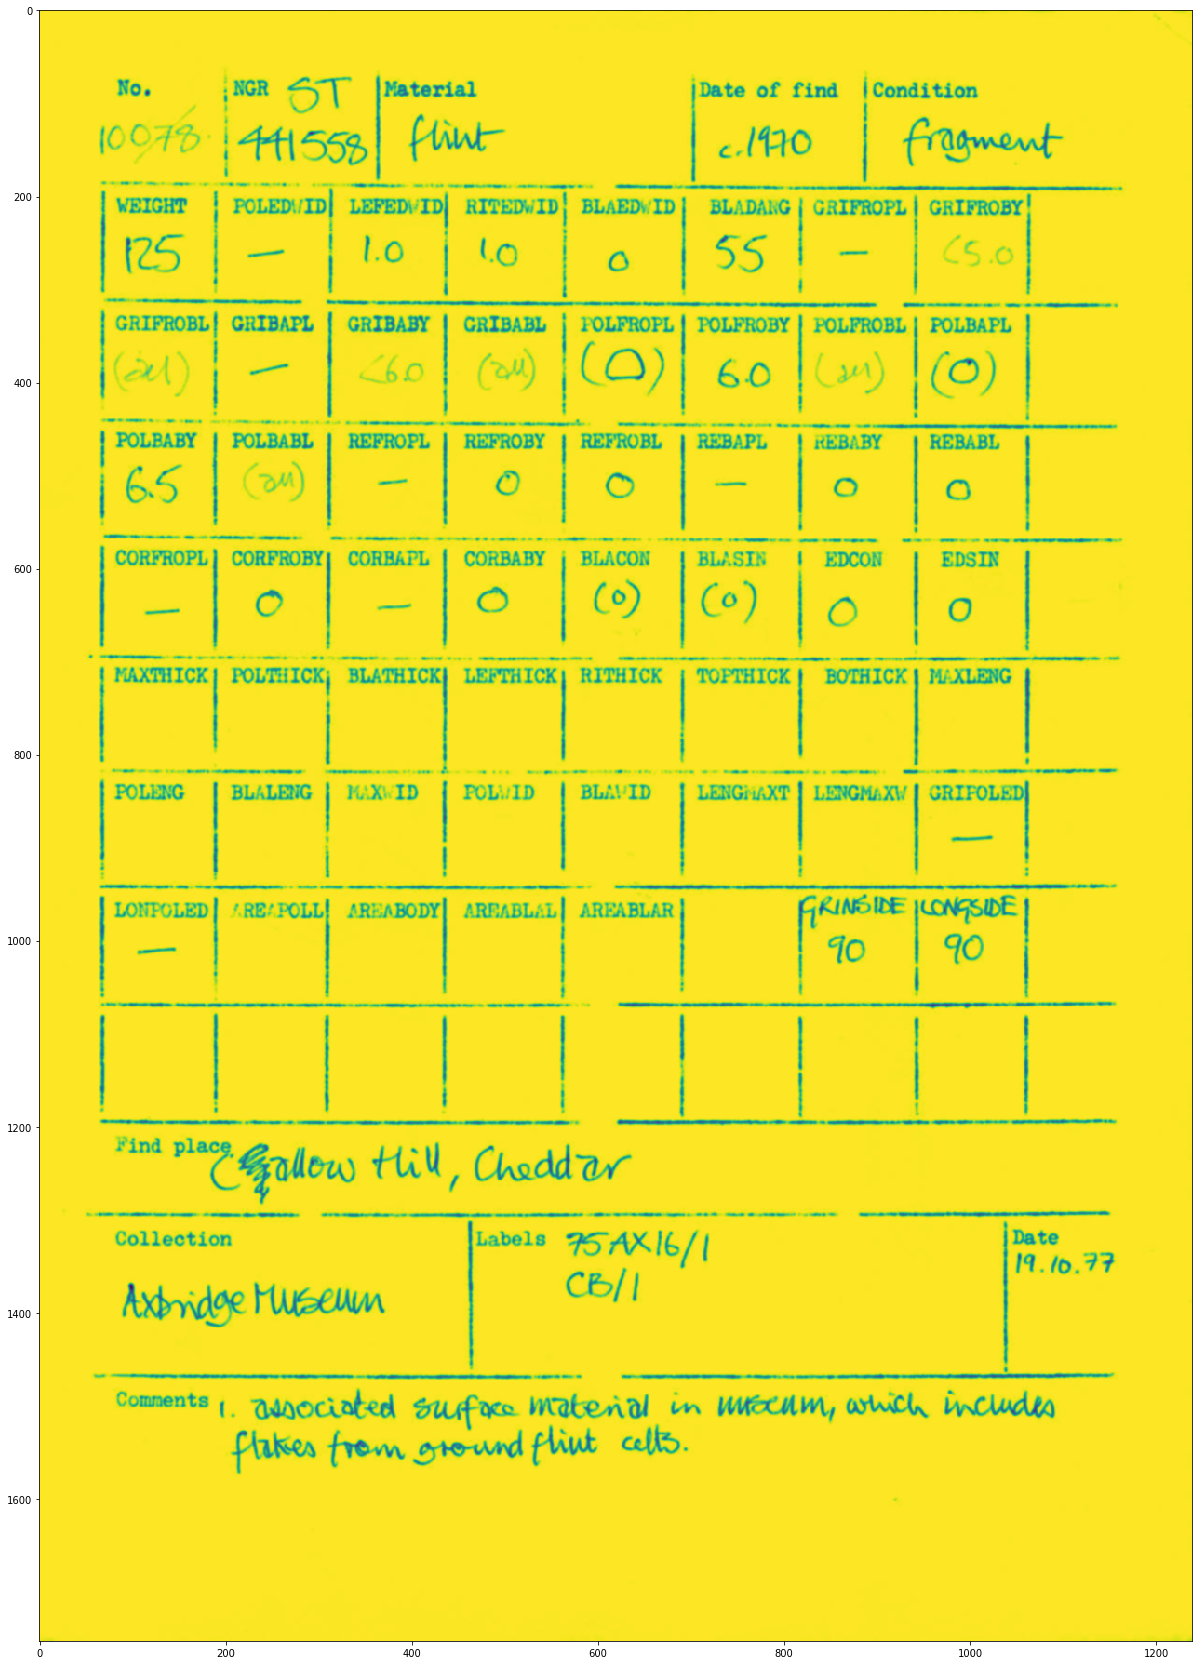

In [6]:
img = cv2.imread("10078-form.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5

blur_gray = cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
#blur_gray = cv2.medianBlur(gray, 5)

plt.imshow(blur_gray)

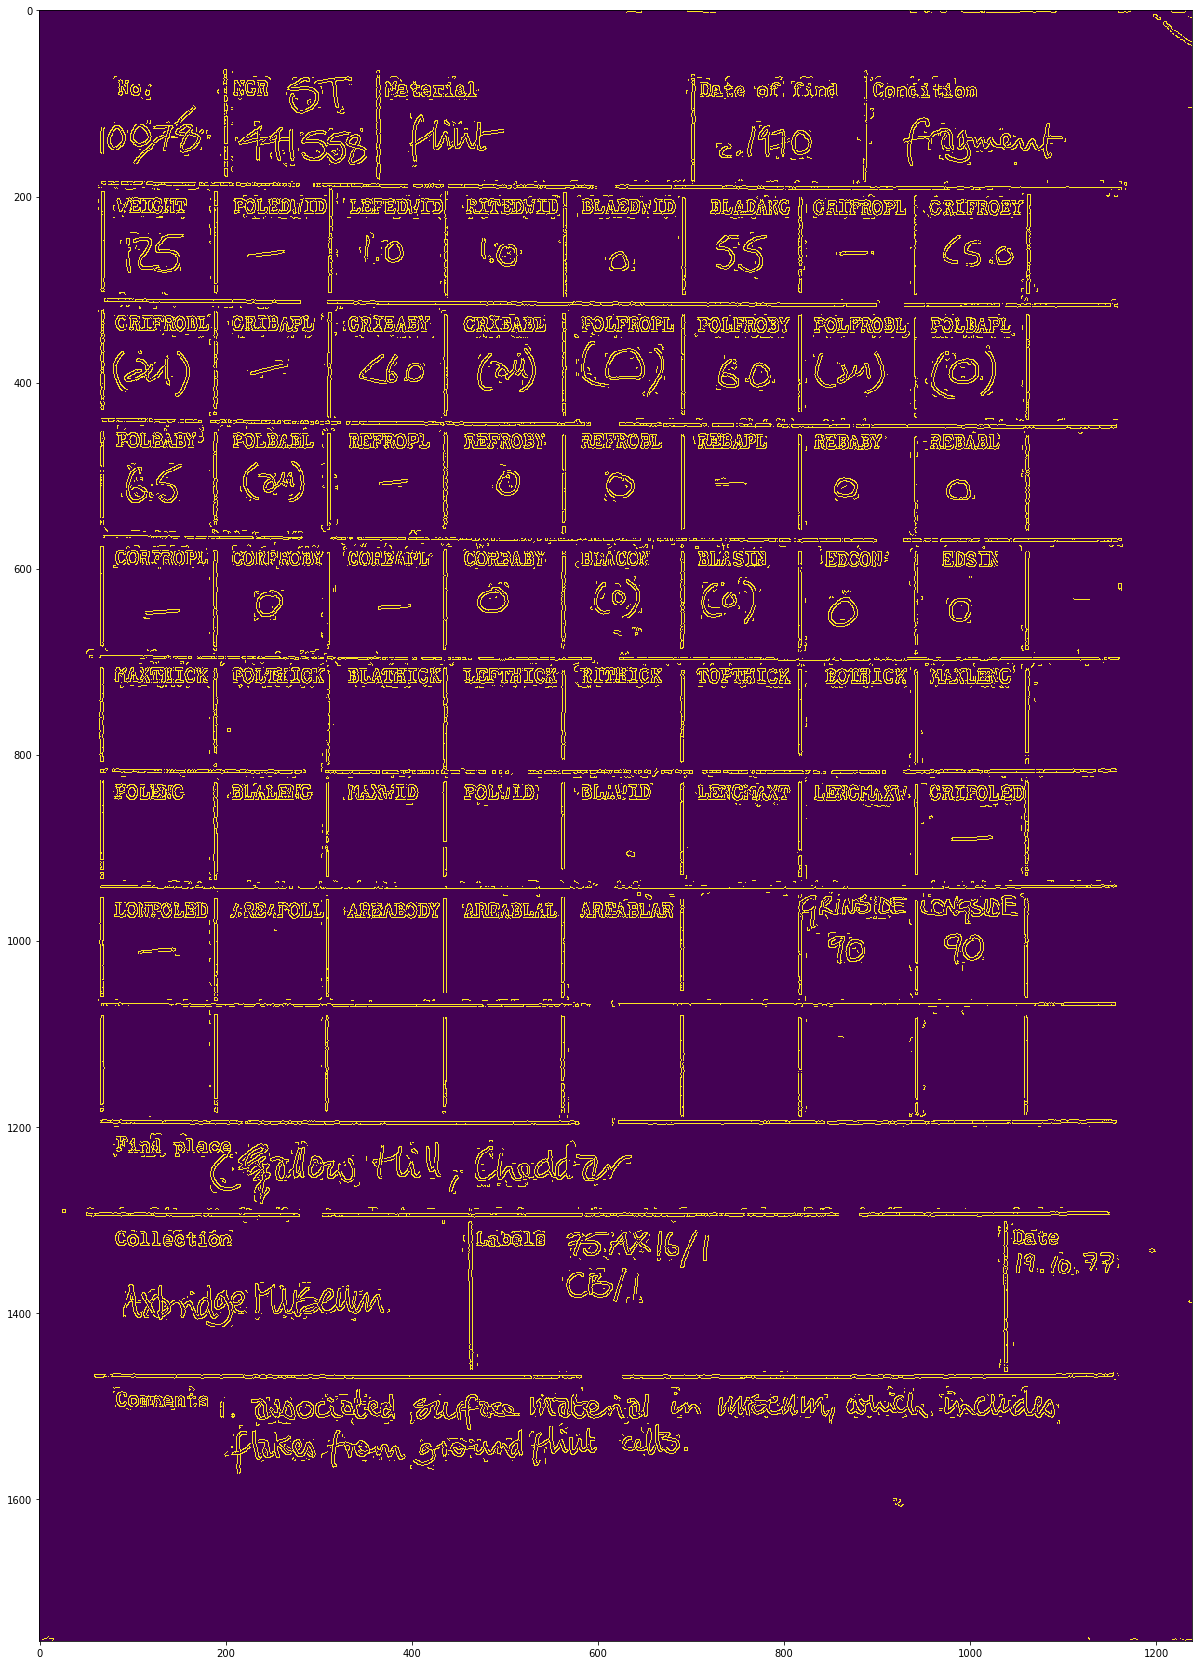

In [14]:
low_threshold = 10
high_threshold = 15
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges)

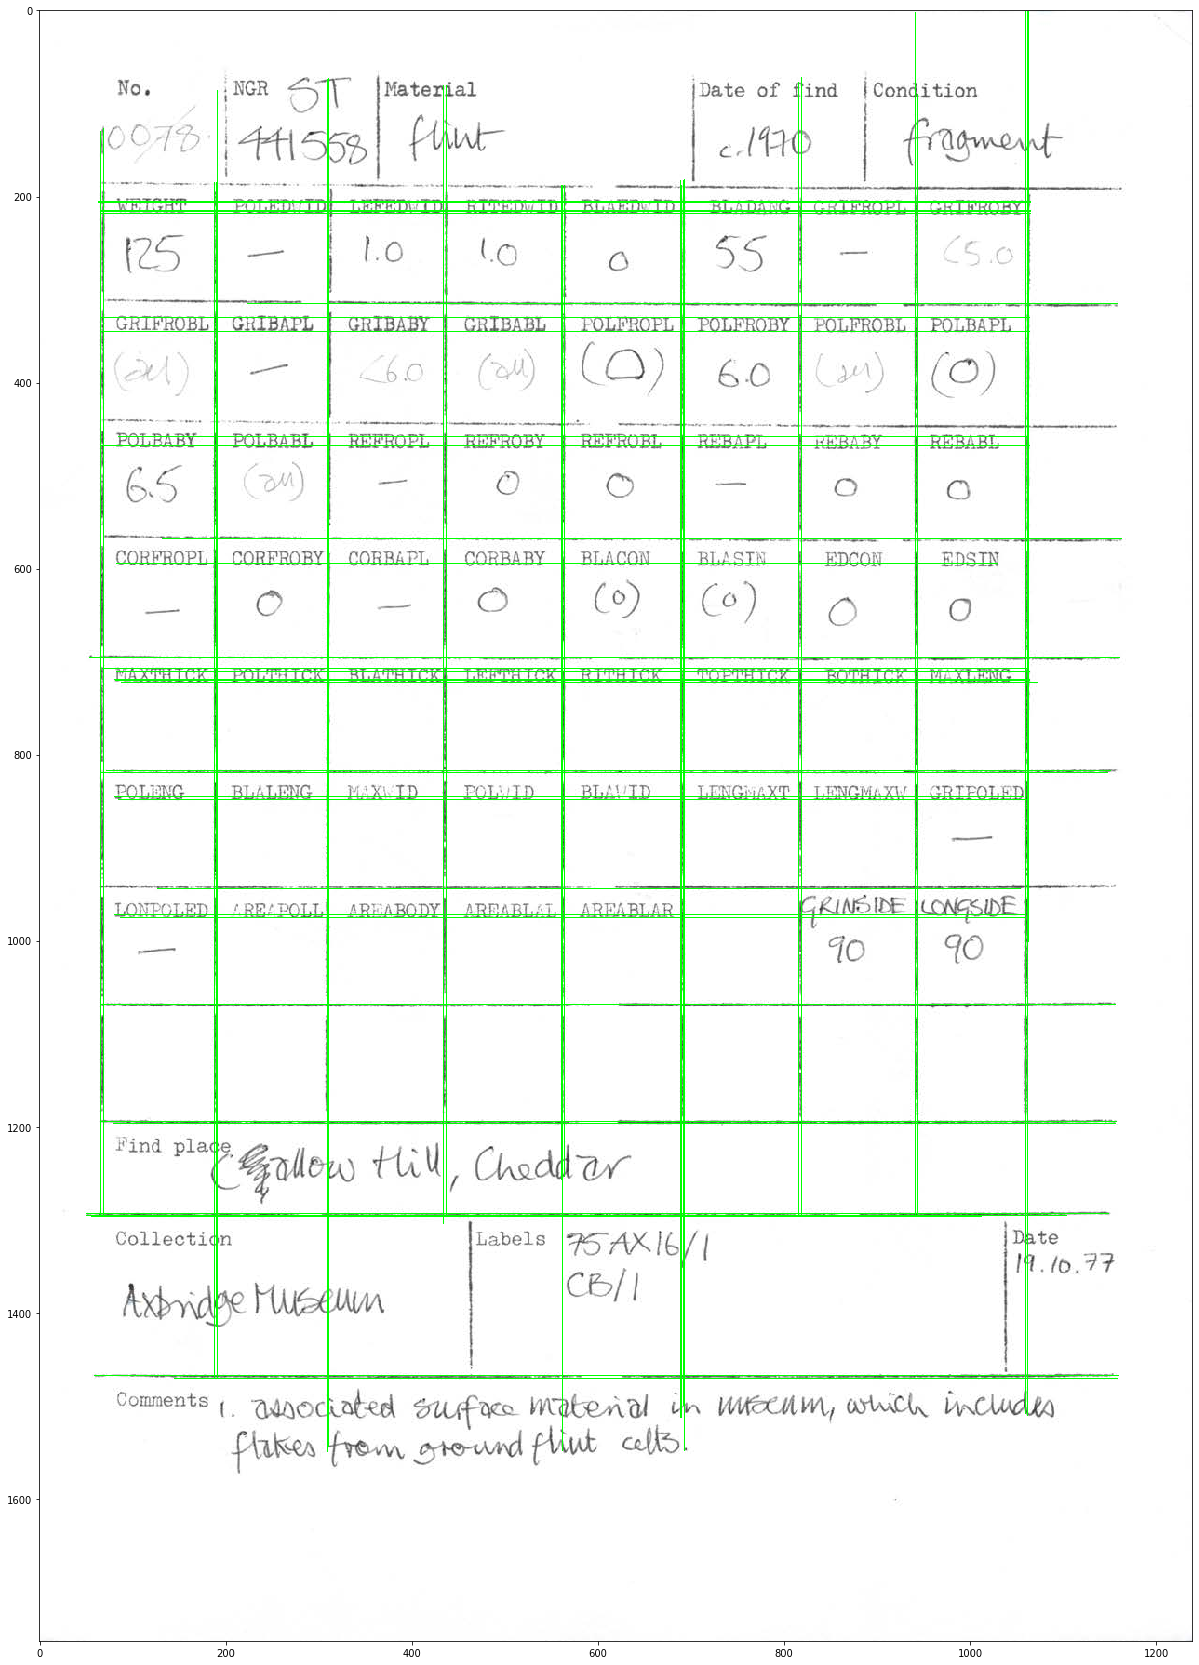

In [17]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = (np.pi / 180) * 90 # angular resolution in radians of the Hough grid
threshold = 300  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 900  # minimum number of pixels making up a line
max_line_gap = 150  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) #* 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), 
                        min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),1)
plt.imshow(line_image)